In [92]:
#importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.metrics.pairwise import cosine_similarity

In [122]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

In [94]:
#read movies dataset from directory
new_data = pd.read_csv('datasets.csv')

In [95]:
#decribing the data
new_data.describe

<bound method NDFrame.describe of           id                                          title  \
0        278                       The Shawshank Redemption   
1      19404                    Dilwale Dulhania Le Jayenge   
2        238                                  The Godfather   
3        424                               Schindler's List   
4        240                         The Godfather: Part II   
...      ...                                            ...   
9995   10196                             The Last Airbender   
9996  331446                       Sharknado 3: Oh Hell No!   
9997   13995                                Captain America   
9998    2312  In the Name of the King: A Dungeon Siege Tale   
9999  455957                                         Domino   

                                                 genre original_language  \
0                                          Drama,Crime                en   
1                                 Comedy,Drama,Romance   

In [96]:
#display top 5 rows from the datasets
new_data.head(5)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,23-09-1994,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,19-10-1995,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,14-03-1972,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,15-12-1993,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,20-12-1974,8.6,9811


In [97]:
#Check for null values in dataset
new_data.isnull().sum()
#Here 0 means there is no null value present and 
#3 and 13 values shows there is null value 
#in genre we have 3 null value
#and in overview we have 13 null values

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [98]:
#it will display the type count and non null to all the column
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [99]:
#displaying columns name
classes = new_data.columns
classes

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

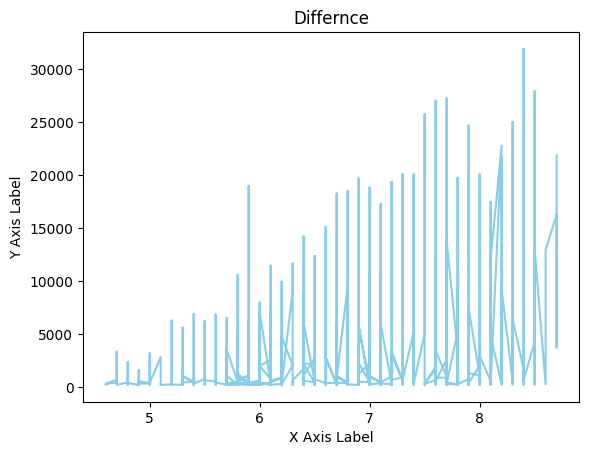

In [100]:
import matplotlib.pyplot as plt
plt.plot(new_data['vote_average'], new_data['vote_count'],color='skyblue',label='measuring average vote and count')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Differnce')
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\1114617181.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_data['release_year'] = pd.to_datetime(new_data['release_date']).dt.year


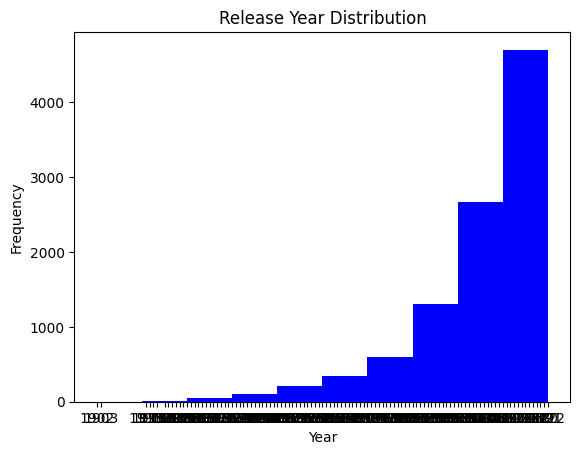

In [101]:
new_data['release_year'] = pd.to_datetime(new_data['release_date']).dt.year

# Plotting histogram
plt.hist(new_data['release_year'], bins=10, color='blue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Release Year Distribution')
plt.xticks(new_data['release_year'].unique())  # Set ticks to unique years
plt.show()

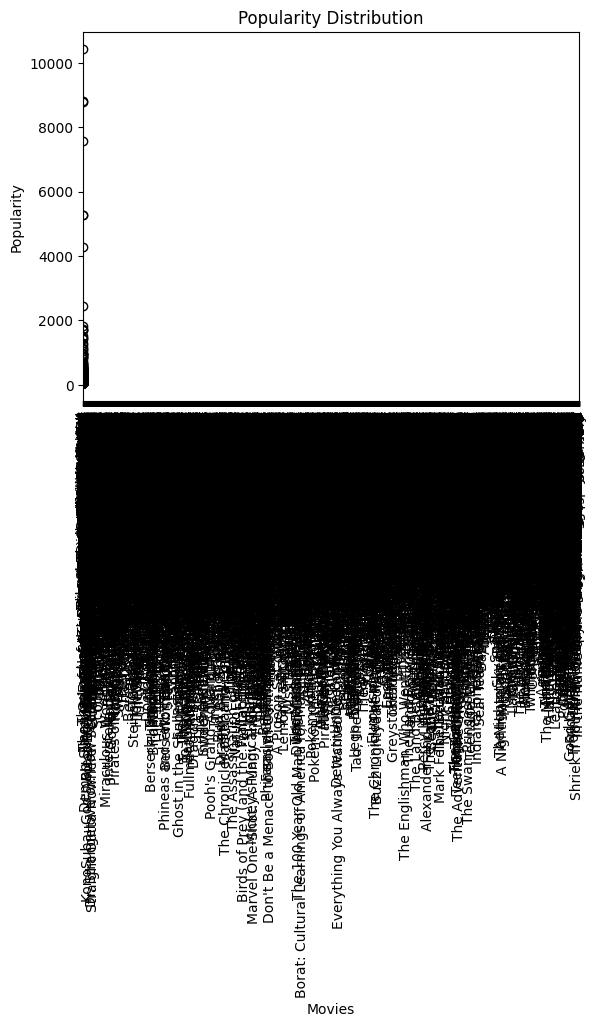

In [102]:
plt.boxplot(new_data['popularity'])
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Popularity Distribution')
plt.xticks(ticks=range(1, len(new_data['title']) + 1), labels=new_data['title'], rotation=90)
plt.show()

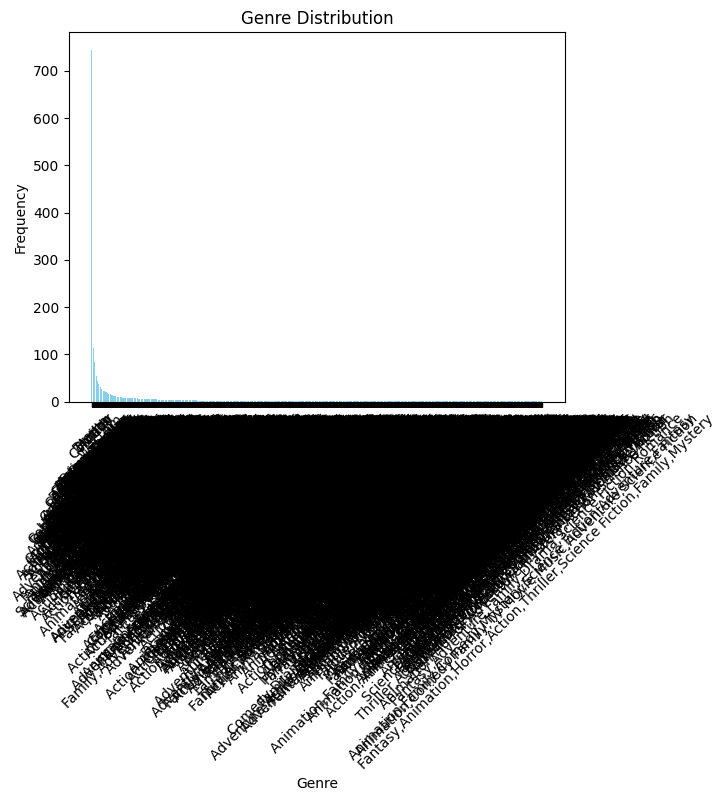

In [103]:
genre_counts = new_data['genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.show()

In [104]:
#removing unneccassay data
new_data.drop(columns=['original_language','popularity','release_date', 'vote_average', 'vote_count'], inplace=True)
new_data.head(5)

,id,title,genre,overview,release_year
0,278,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...,1994
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second...",1995
2,238,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o...",1972
3,424,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...,1993
4,240,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...,1974


In [105]:
new_data.columns

Index(['id', 'title', 'genre', 'overview', 'release_year'], dtype='object')

In [106]:
#display only necessary data
new_data = new_data[['id','title','overview','genre']]
new_data

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [107]:
#merge to column overview and genre to make a new column tags which is more meaning full
new_data['tags'] = new_data['overview']+new_data['genre']
new_data

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [108]:
#now we have tags than removes overview and genre from dataset
# Assuming 'new_data' is your DataFrame
new_data = new_data.drop(columns=['overview','genre'])
new_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [109]:
new_data.head(5)

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...


In [110]:
#Processing text data
cv = CountVectorizer(max_features=10000, stop_words='english')
cv

CountVectorizer(max_features=10000, stop_words='english')

In [111]:
#now fit the data into the loaded model and transform using the same model
vector = cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [112]:
#Return values
vector.shape

(10000, 10000)

In [113]:
#here it return the cosine data
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.05634362, 0.12888482, ..., 0.07559289, 0.11065667,
        0.06388766],
       [0.05634362, 1.        , 0.07624929, ..., 0.        , 0.03636965,
        0.        ],
       [0.12888482, 0.07624929, 1.        , ..., 0.02273314, 0.06655583,
        0.08645856],
       ...,
       [0.07559289, 0.        , 0.02273314, ..., 1.        , 0.03253   ,
        0.02817181],
       [0.11065667, 0.03636965, 0.06655583, ..., 0.03253   , 1.        ,
        0.0412393 ],
       [0.06388766, 0.        , 0.08645856, ..., 0.02817181, 0.0412393 ,
        1.        ]])

In [117]:
#here we display the recommended movies generated from the given text
distance = sorted(list(enumerate(similarity[2])),reverse=True, key=lambda vector:vector[1])
for i in distance[0:10]:
    print(new_data.iloc[i[0]].title)

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City
Gotti
Felon
Rope
Batman: The Killing Joke
The Big Heat


In [118]:
#here we create a method which take movie name as an input and print recommended movies
def recommend(data):
    index = new_data[new_data['title']==data].index[0]
    distance = sorted(list(enumerate(similarity[index])),reverse=True, key=lambda vector:vector[1])
    for i in distance[0:10]:
        print(new_data.iloc[i[0]].title)

In [119]:
#calling the recommed method
recommend('Iron Man')

Iron Man
Iron Man 3
Guardians of the Galaxy Vol. 2
Avengers: Age of Ultron
Star Wars: Episode III - Revenge of the Sith
G.O.R.A.
Iron Man 2
Charlie's Angels
Everything Everywhere All at Once
Star Wars: Episode I - The Phantom Menace


In [120]:
#import pickle and then dump/save the models in memory

pickle.dump(new_data,open('movies_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\1941106909.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='movies_list.pkl'>
  pickle.dump(new_data,open('movies_list.pkl','wb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\1941106909.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='similarity.pkl'>
  pickle.dump(similarity,open('similarity.pkl','wb'))


In [121]:
#This model is used to recommend the movies
pickle.load(open('movies_list.pkl','rb'))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\3277266157.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='movies_list.pkl'>
  pickle.load(open('movies_list.pkl','rb'))


,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
